<a href="https://colab.research.google.com/github/Alfred78w/AI_project/blob/main/Pr%C3%A9diction_m%C3%A9t%C3%A9o_avec_randomforest_et_Cross_validation_et_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import des librairies

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 25)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
file_path = 'meteo.csv'
dataset = pd.read_csv(file_path)

In [ ]:
# @title Annalyse exploratoire

dataset.shape

(1244, 47)

Le jeu de donnée contient 47 variables et 1244 observations

In [ ]:
# @title Visualiser les 5 premières lignes du dataset
dataset.head(10)

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,Snowfall.amount.raw.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,...,Medium.Cloud.Cover.daily.min..mid.cld.lay.,Low.Cloud.Cover.daily.max..low.cld.lay.,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
0,1,2010,6,1,0,0,13.45,77.88,1015.76,0.1,0.0,65.04,...,0,100,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24,True
1,3,2010,6,3,0,0,14.27,83.58,1016.39,0.0,0.0,80.95,...,0,100,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24,False
2,5,2010,6,5,0,0,19.88,66.58,1018.18,0.0,0.0,0.00,...,0,0,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72,True
3,7,2010,6,7,0,0,19.31,72.00,1013.60,0.4,0.0,49.69,...,0,100,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72,True
4,9,2010,6,9,0,0,22.06,74.29,1005.01,2.0,0.0,58.77,...,0,100,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24,False
5,11,2010,6,11,0,0,20.85,76.21,1009.33,1.4,0.0,49.75,...,0,100,0,27.76,0.72,33.53,0.80,34.58,0.80,41.04,1.08,True
6,13,2010,6,13,0,0,16.13,86.12,1013.63,5.1,0.0,92.08,...,0,100,0,12.03,4.68,20.16,6.48,19.49,0.00,22.32,5.76,True
7,15,2010,6,15,0,0,15.94,87.92,1014.41,8.2,0.0,77.60,...,0,100,0,17.73,1.80,20.57,2.04,42.05,14.78,24.48,2.88,True
8,17,2010,6,17,0,0,15.04,90.71,1012.70,4.8,0.0,100.00,...,0,100,100,11.97,3.71,18.95,5.96,28.34,2.90,31.68,4.32,True
9,19,2010,6,19,0,0,12.54,82.38,1009.01,5.3,0.0,82.57,...,0,100,0,19.39,5.59,23.11,11.92,28.55,14.58,28.08,8.28,True


In [ ]:
# @title Supprimons les colonnes moins pertinentes



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1244 non-null   int64  
 1   Year                                          1244 non-null   int64  
 2   Month                                         1244 non-null   int64  
 3   Day                                           1244 non-null   int64  
 4   Hour                                          1244 non-null   int64  
 5   Minute                                        1244 non-null   int64  
 6   Temperature.daily.mean..2.m.above.gnd.        1244 non-null   float64
 7   Relative.Humidity.daily.mean..2.m.above.gnd.  1244 non-null   float64
 8   Mean.Sea.Level.Pressure.daily.mean..MSL.      1244 non-null   float64
 9   Total.Precipitation.daily.sum..sfc.           1244 non-null   f

On observe qu'il n'y a pas de valeurs manquantes à traiter.
Par ailleurs, il y a 3 format de données:

1.   int64: nombres entiers relatifs
2.   bool: variables booléennes
3.   float64: nombres décimaux






In [ ]:
# @title Suprimmons les colonnes qui ne sont pas nécessaires
colonnes_a_supprimer = ['Year', 'Day', 'Hour', 'Minute']
Clean_dataset = dataset.drop(colonnes_a_supprimer, axis=1)
Clean_dataset['pluie.demain'] = Clean_dataset['pluie.demain'].astype(int)

In [ ]:
Clean_dataset.describe()

,Unnamed: 0,Month,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,Snowfall.amount.raw.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,High.Cloud.Cover.daily.mean..high.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,Sunshine.Duration.daily.sum..sfc.,...,Medium.Cloud.Cover.daily.min..mid.cld.lay.,Low.Cloud.Cover.daily.max..low.cld.lay.,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
count,1244.00000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,1446.85209,6.492765,12.226616,71.450595,1017.014510,2.213505,0.061559,50.655651,19.745627,31.283746,39.676632,377.430129,...,1.952572,80.847267,4.550643,19.218690,3.681318,25.445466,4.901037,42.257982,11.371608,29.491640,6.655370,0.497588
std,855.31687,3.428025,7.094412,9.419637,7.962332,4.301138,0.595951,31.444141,20.846430,29.307614,31.049154,278.019402,...,10.413425,37.416907,18.747331,9.298039,4.235600,10.742637,6.157457,21.936074,12.358915,15.163162,7.486143,0.500195
min,1.00000,1.000000,-7.100000,41.120000,978.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.610000,0.000000,4.840000,0.000000,6.130000,0.000000,5.040000,0.000000,0.000000
25%,700.50000,4.000000,6.695000,65.110000,1012.645000,0.000000,0.000000,22.205000,2.200000,2.677500,8.490000,118.410000,...,0.000000,100.000000,0.000000,12.310000,1.080000,18.190000,1.125000,25.180000,3.260000,19.080000,2.160000,0.000000
50%,1438.00000,6.000000,12.575000,71.880000,1016.965000,0.100000,0.000000,52.875000,13.230000,23.770000,38.705000,371.545000,...,0.000000,100.000000,0.000000,17.330000,2.310000,23.815000,2.550000,37.935000,7.150000,25.920000,3.960000,0.000000
75%,2183.50000,9.000000,17.640000,78.420000,1021.647500,2.500000,0.000000,78.342500,32.590000,54.710000,63.580000,591.890000,...,0.000000,100.000000,0.000000,23.875000,4.800000,29.917500,6.130000,55.505000,14.690000,36.360000,8.640000,1.000000
max,2941.00000,12.000000,29.590000,95.250000,1038.580000,40.300000,13.860000,100.000000,94.540000,100.000000,100.000000,1022.210000,...,100.000000,100.000000,100.000000,69.420000,36.040000,79.780000,46.130000,124.200000,82.070000,97.920000,51.120000,1.000000


<ipython-input-37-4f279a2b41e7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Clean_dataset['pluie.demain'], shade=True);


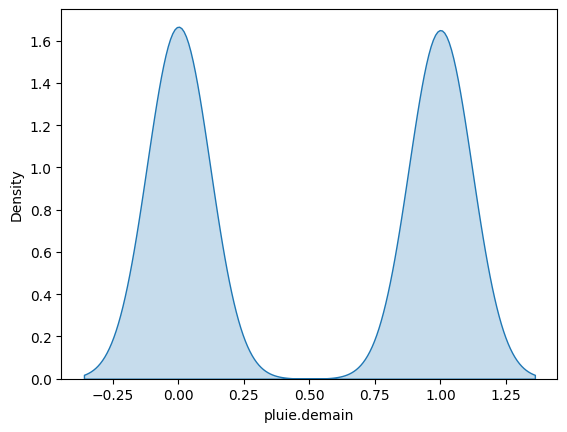

In [ ]:
# @title Analyse descriptive des variables

# annalyse de la variable cible
sns.kdeplot(Clean_dataset['pluie.demain'], shade=True);

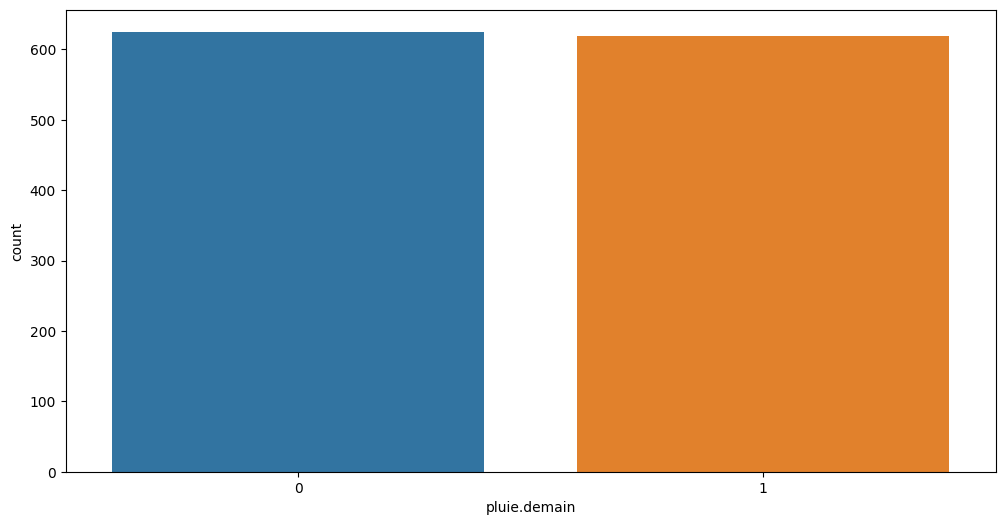

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='pluie.demain', data=Clean_dataset)
plt.show()

Ici il n'y a pas de déséquilibre entre les données. Il y a presque autant de true que de False

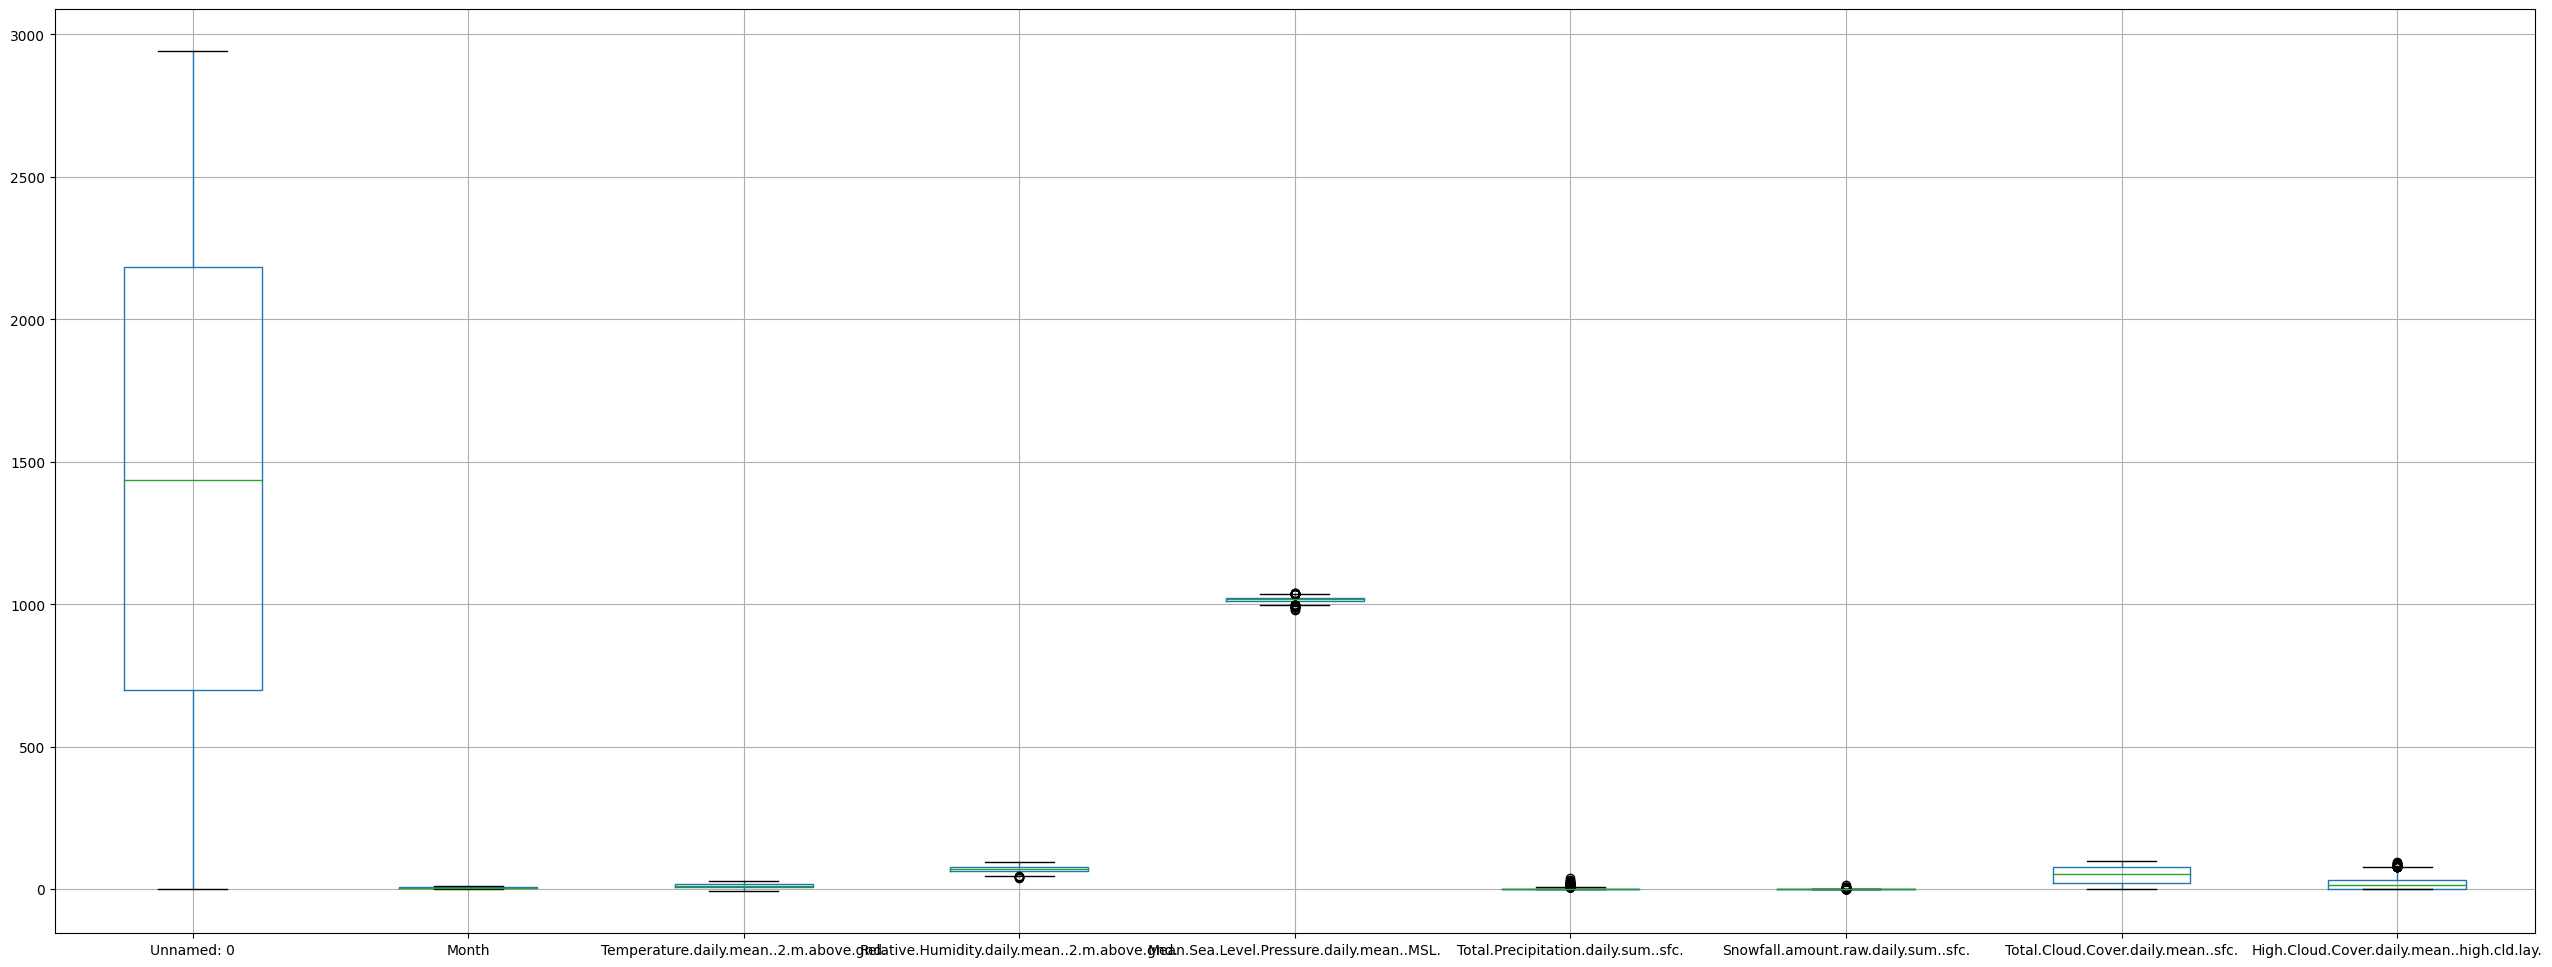

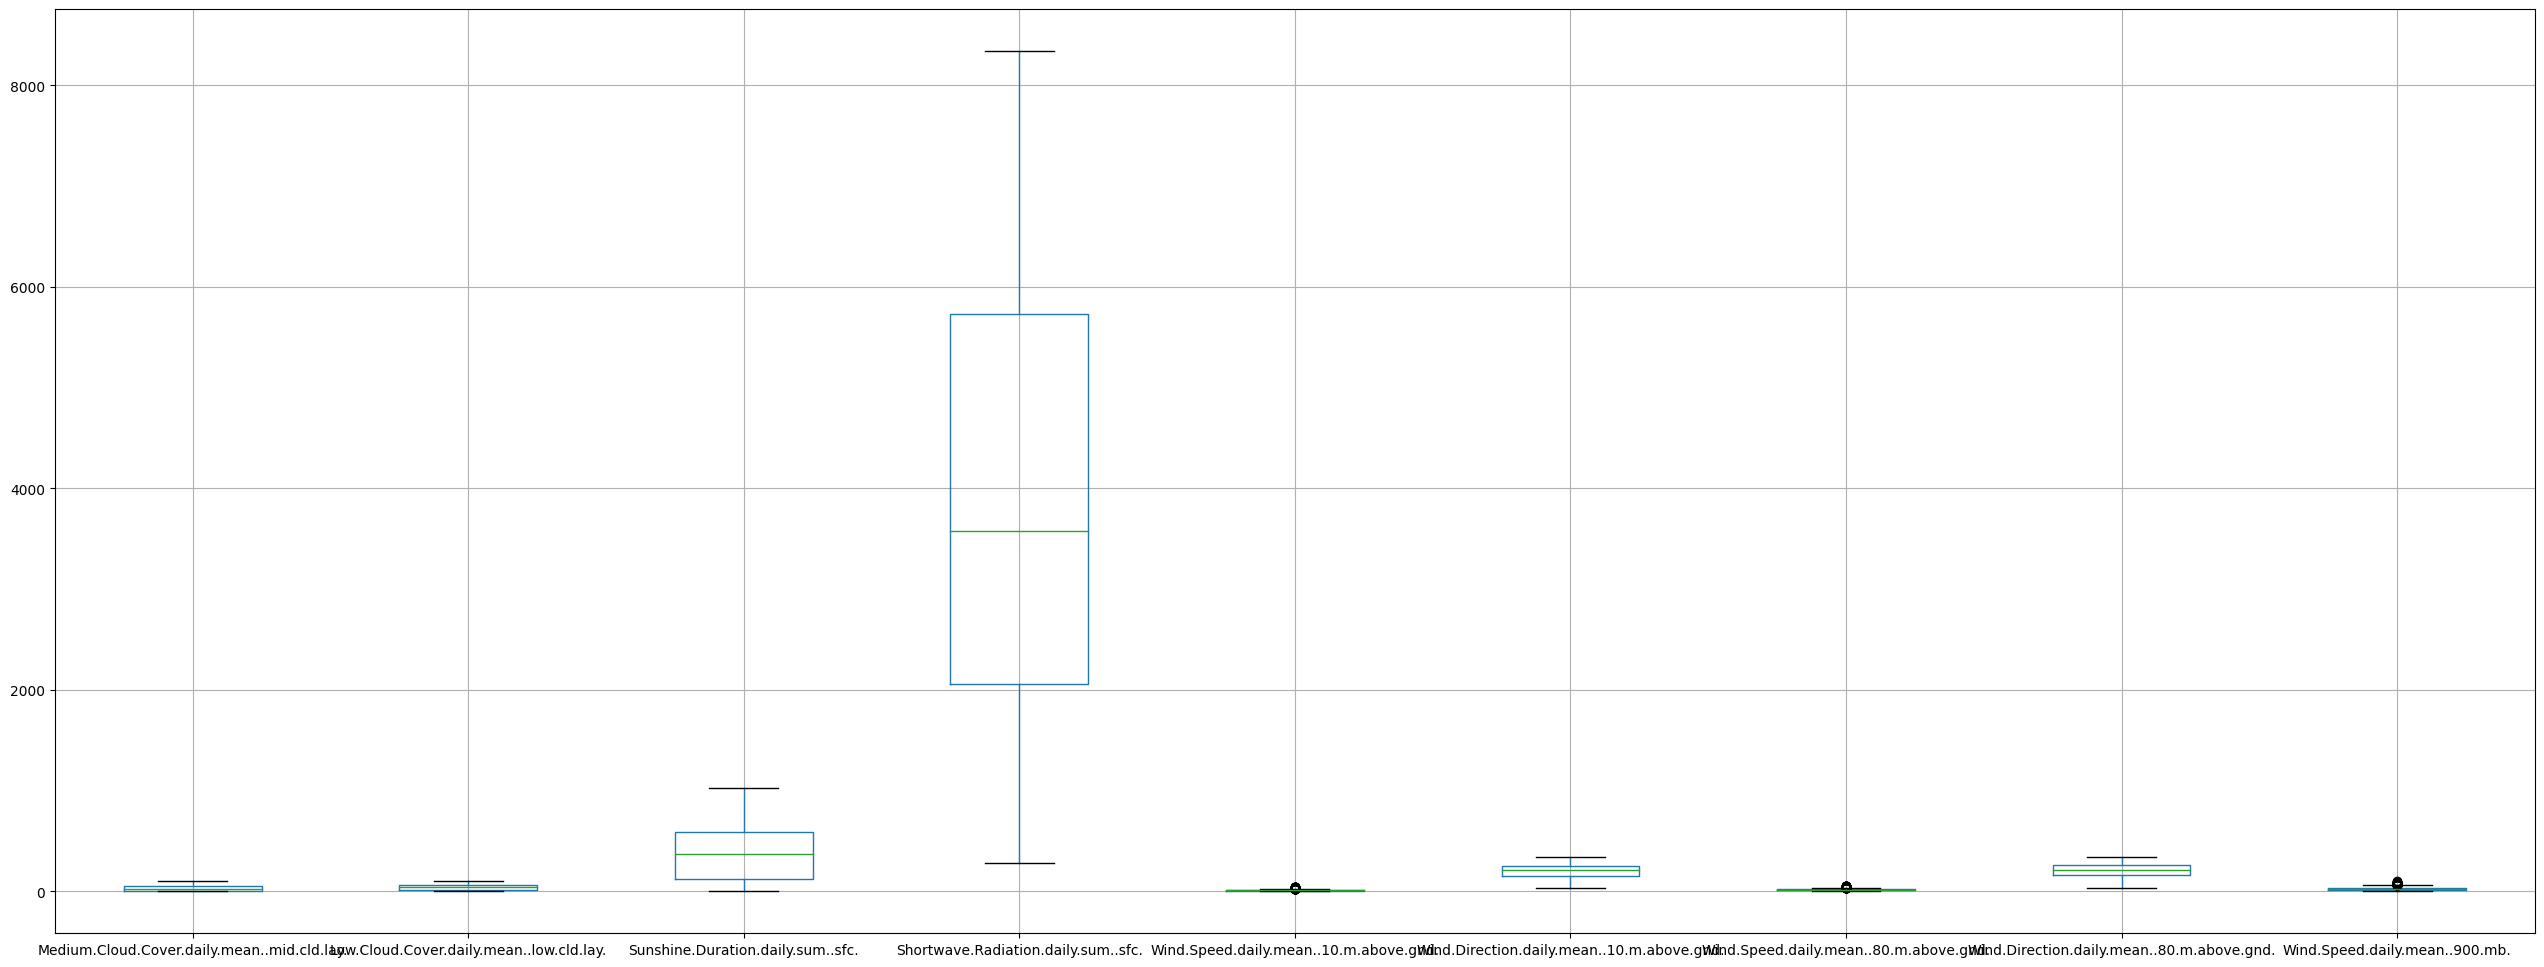

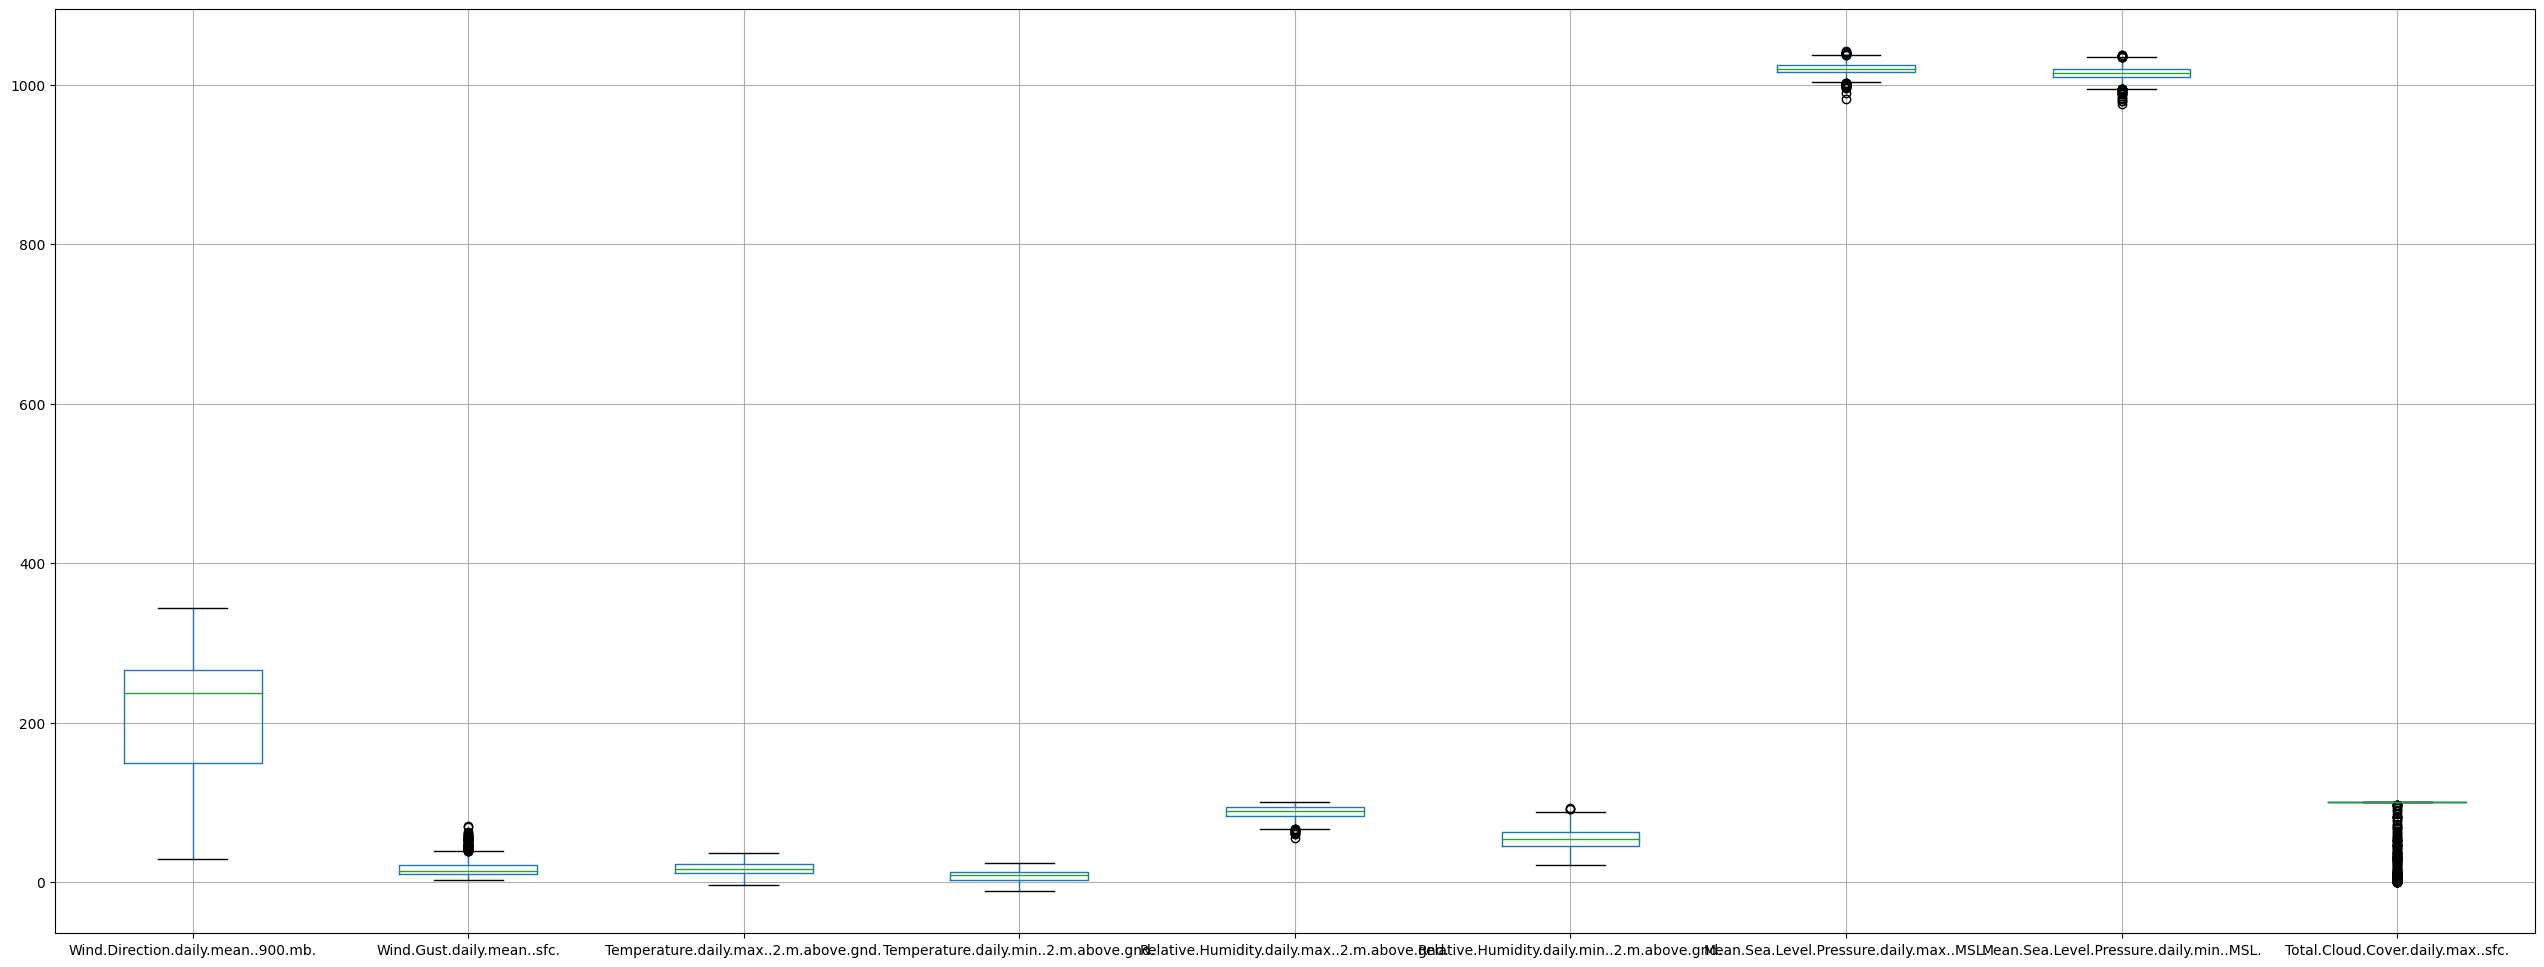

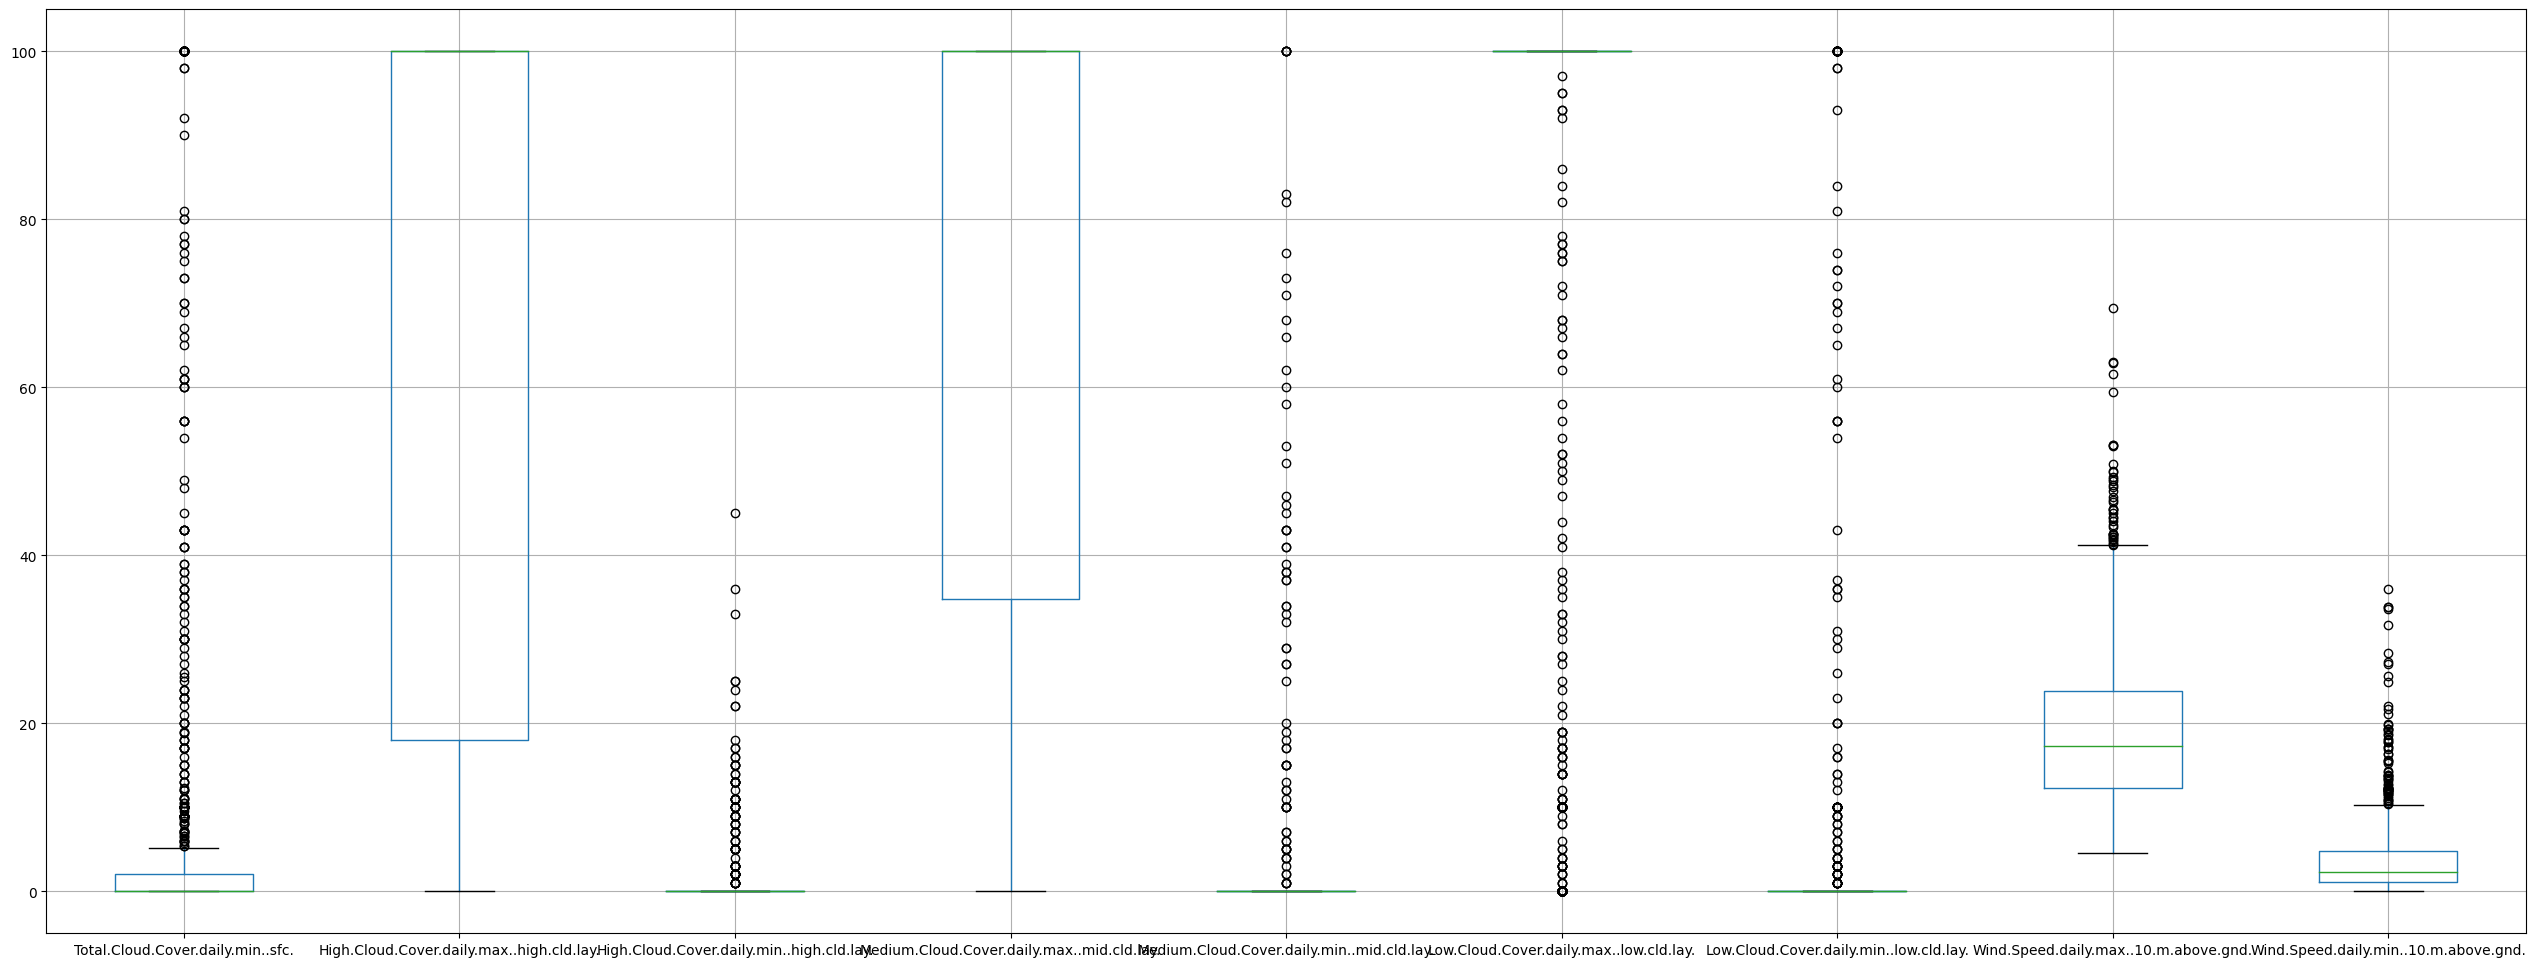

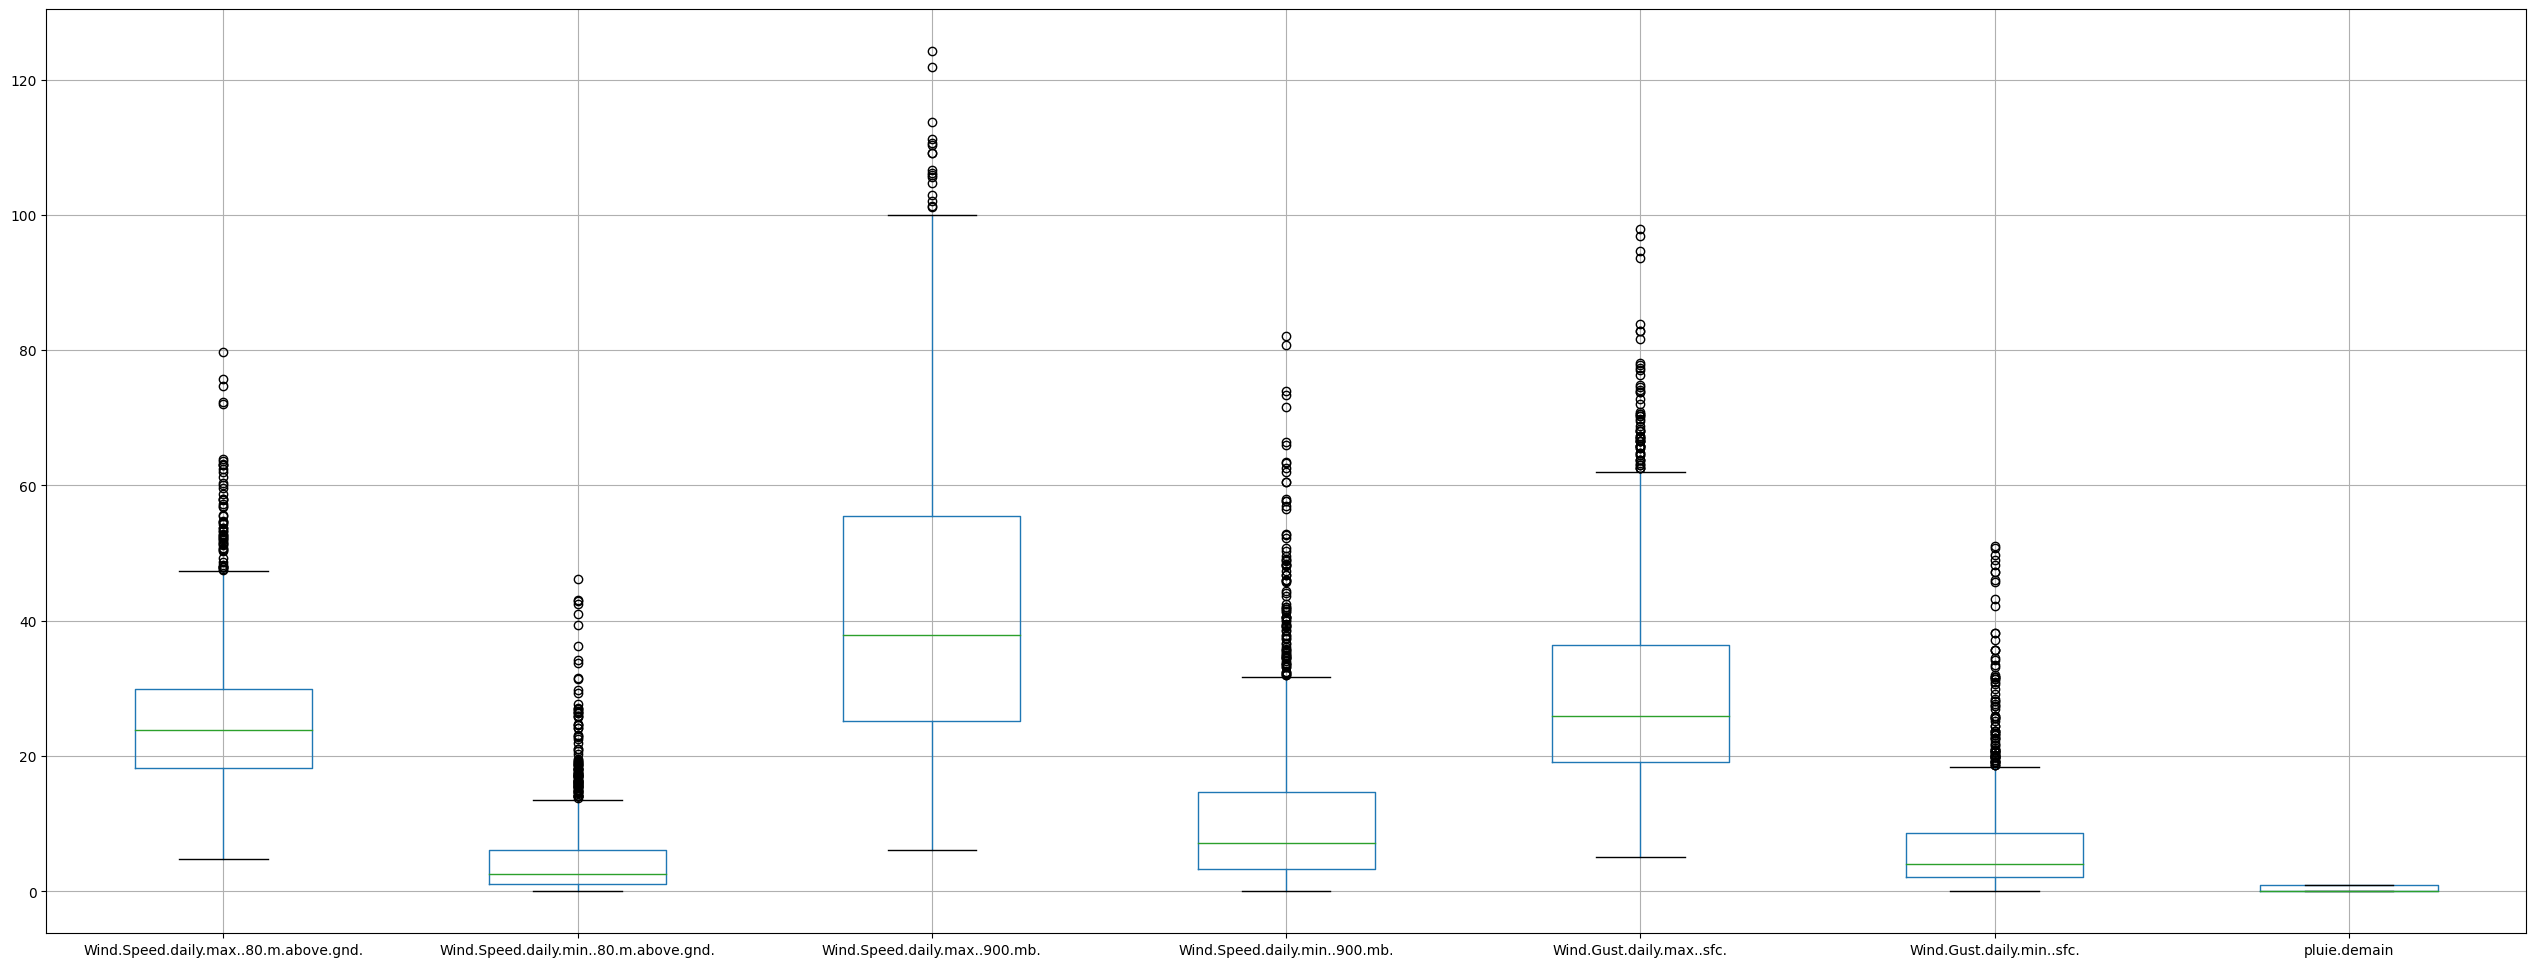

In [ ]:
for j in range(1, 6):
    plt.figure(figsize=(32, 12))
    Clean_dataset.iloc[:, (j-1)*9:9*j].boxplot()

In [ ]:
Liste_colonne= []
for i in Clean_dataset:
  Liste_colonne.append(i)
print(Liste_colonne)

['Unnamed: 0', 'Month', 'Temperature.daily.mean..2.m.above.gnd.', 'Relative.Humidity.daily.mean..2.m.above.gnd.', 'Mean.Sea.Level.Pressure.daily.mean..MSL.', 'Total.Precipitation.daily.sum..sfc.', 'Snowfall.amount.raw.daily.sum..sfc.', 'Total.Cloud.Cover.daily.mean..sfc.', 'High.Cloud.Cover.daily.mean..high.cld.lay.', 'Medium.Cloud.Cover.daily.mean..mid.cld.lay.', 'Low.Cloud.Cover.daily.mean..low.cld.lay.', 'Sunshine.Duration.daily.sum..sfc.', 'Shortwave.Radiation.daily.sum..sfc.', 'Wind.Speed.daily.mean..10.m.above.gnd.', 'Wind.Direction.daily.mean..10.m.above.gnd.', 'Wind.Speed.daily.mean..80.m.above.gnd.', 'Wind.Direction.daily.mean..80.m.above.gnd.', 'Wind.Speed.daily.mean..900.mb.', 'Wind.Direction.daily.mean..900.mb.', 'Wind.Gust.daily.mean..sfc.', 'Temperature.daily.max..2.m.above.gnd.', 'Temperature.daily.min..2.m.above.gnd.', 'Relative.Humidity.daily.max..2.m.above.gnd.', 'Relative.Humidity.daily.min..2.m.above.gnd.', 'Mean.Sea.Level.Pressure.daily.max..MSL.', 'Mean.Sea.Level.

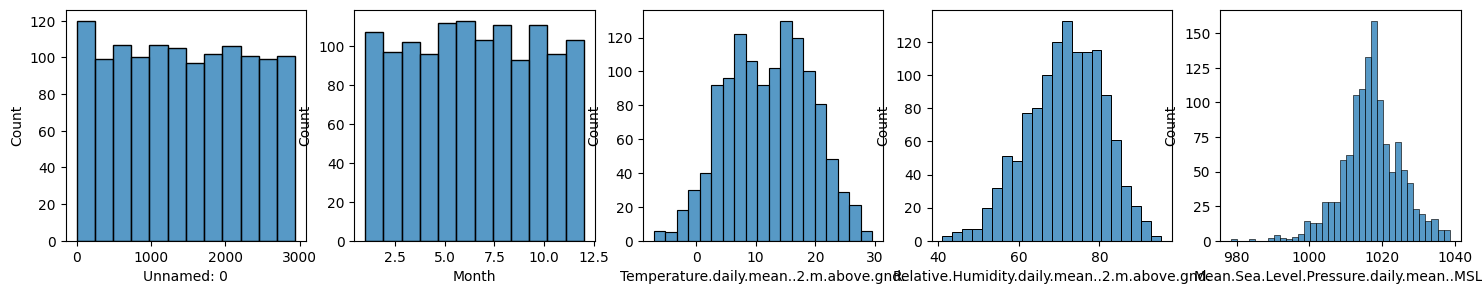

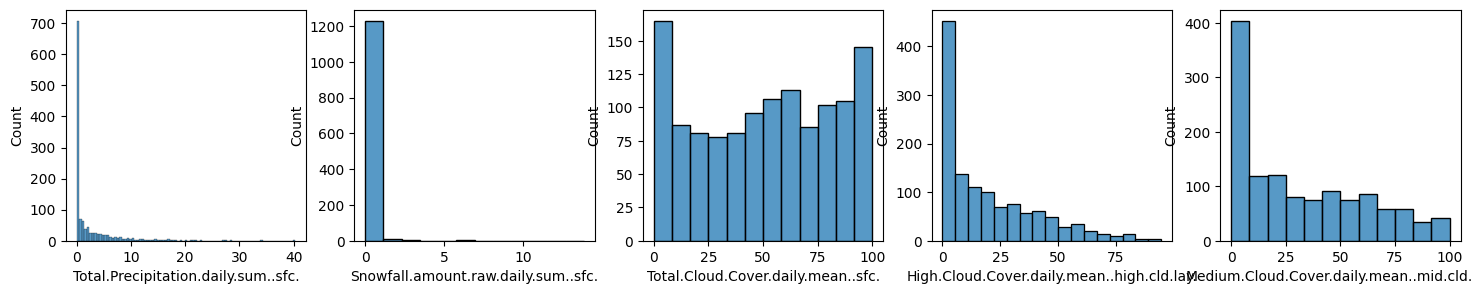

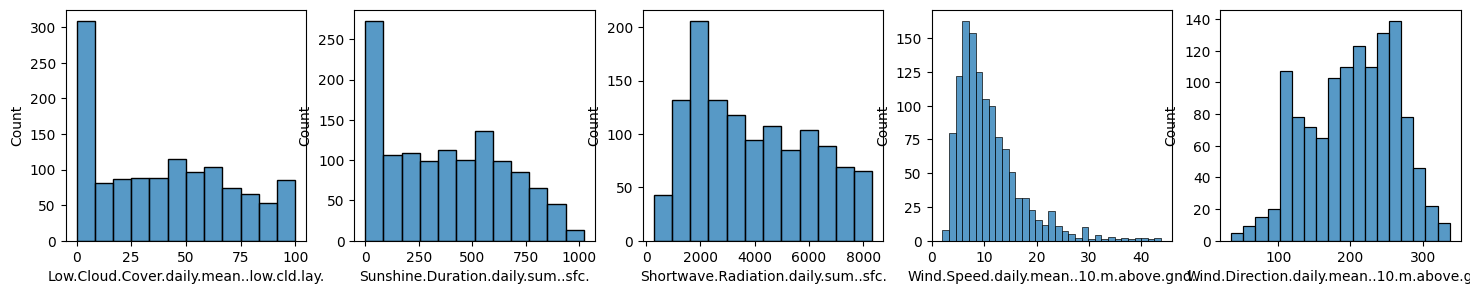

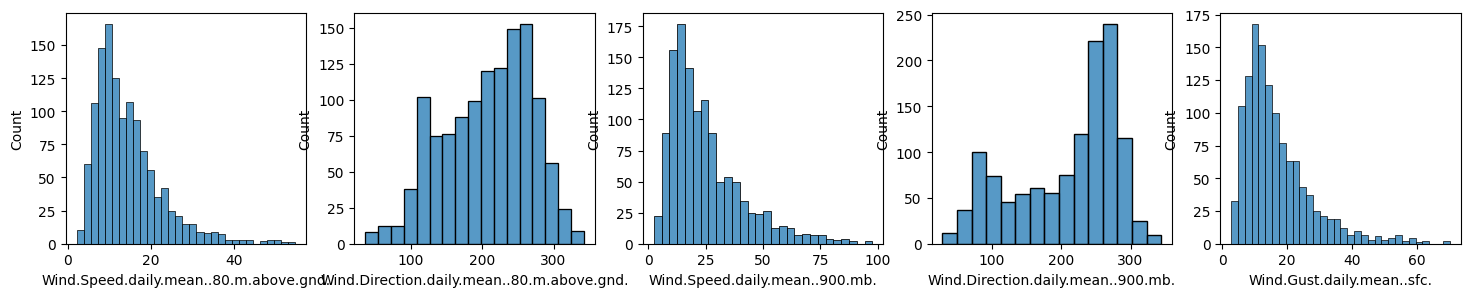

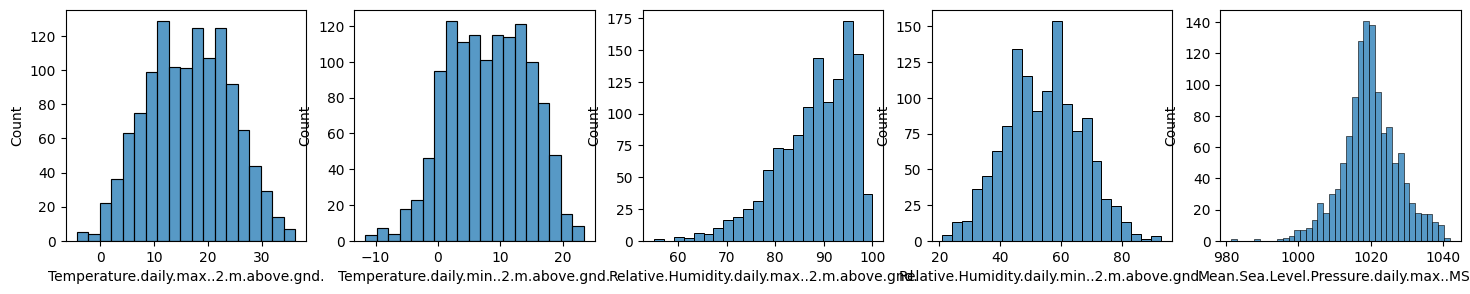

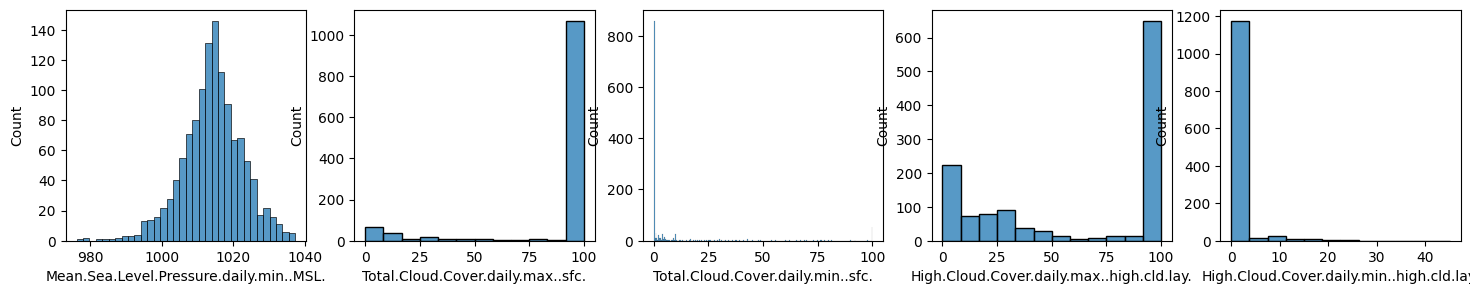

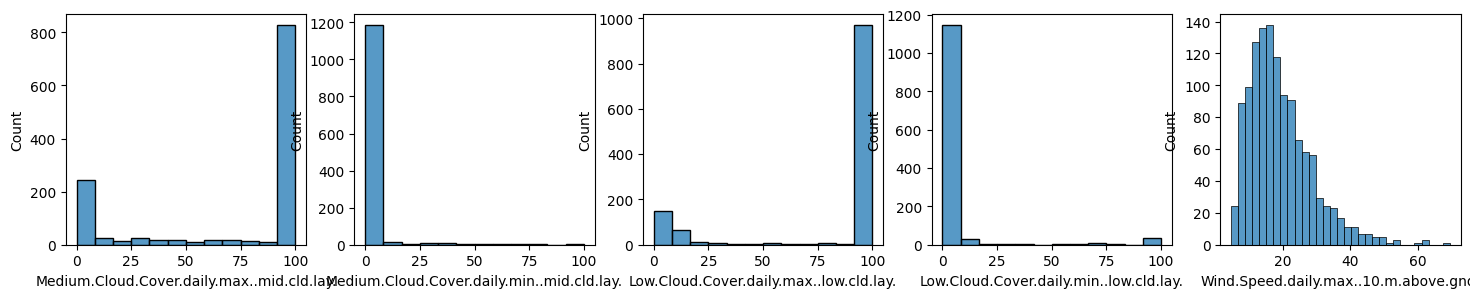

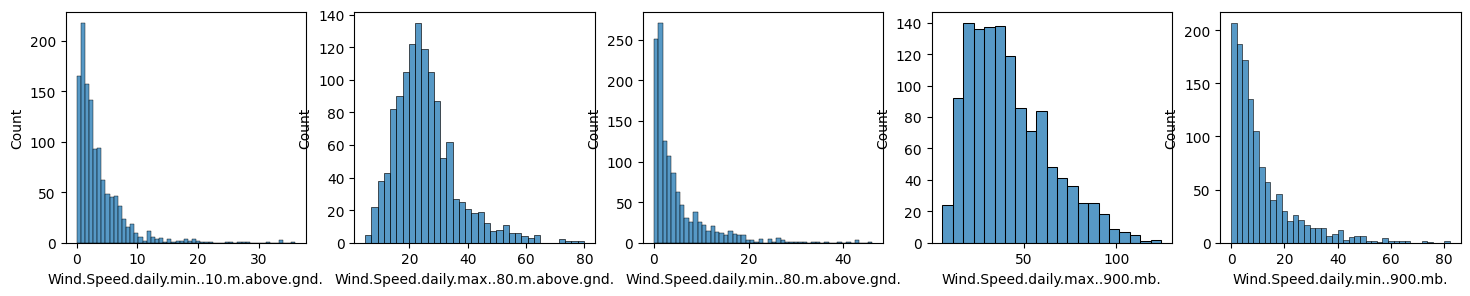

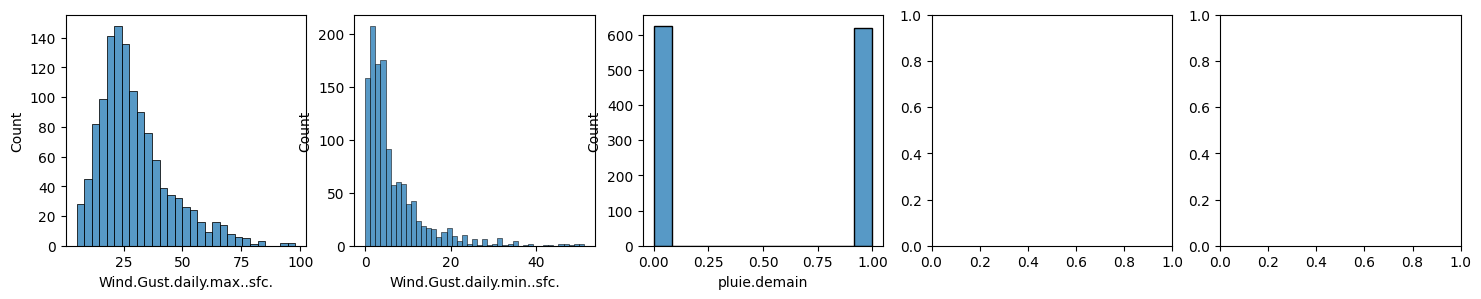

In [ ]:
# Distribution des variables quantitatives

plt.rcParams["figure.figsize"]

for j in range(1, 10):
    fig, axs = plt.subplots(1,5, figsize=(18,3))
    for i, feature in enumerate(Liste_colonne[(j-1)*5:5*j]):
        sns.histplot(Clean_dataset[feature], ax = axs[i])
    plt.show()


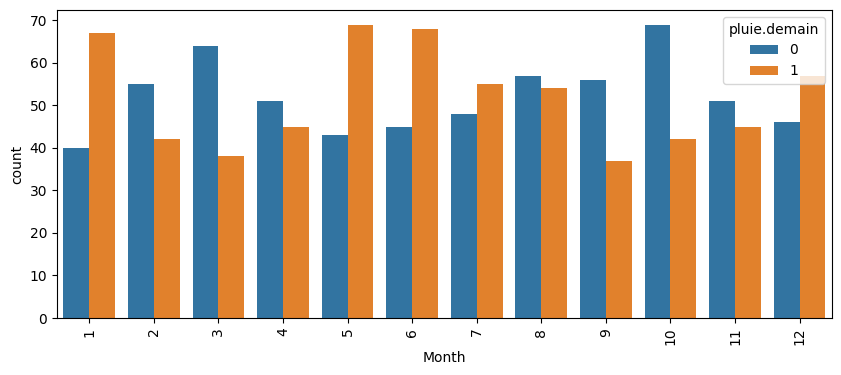

In [ ]:
# On peut s'aider des boites à moustaches pour visualiser la distribution de la
# en fonction de la du mois  La ville à clairement un impact sur le prix.

fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Month', hue='pluie.demain', data=Clean_dataset)
ax.tick_params(axis='x', rotation=90)

On voit ici que pendant le moi 1,5, 6 et 12 il pleut beaucoup plus que les autres mois

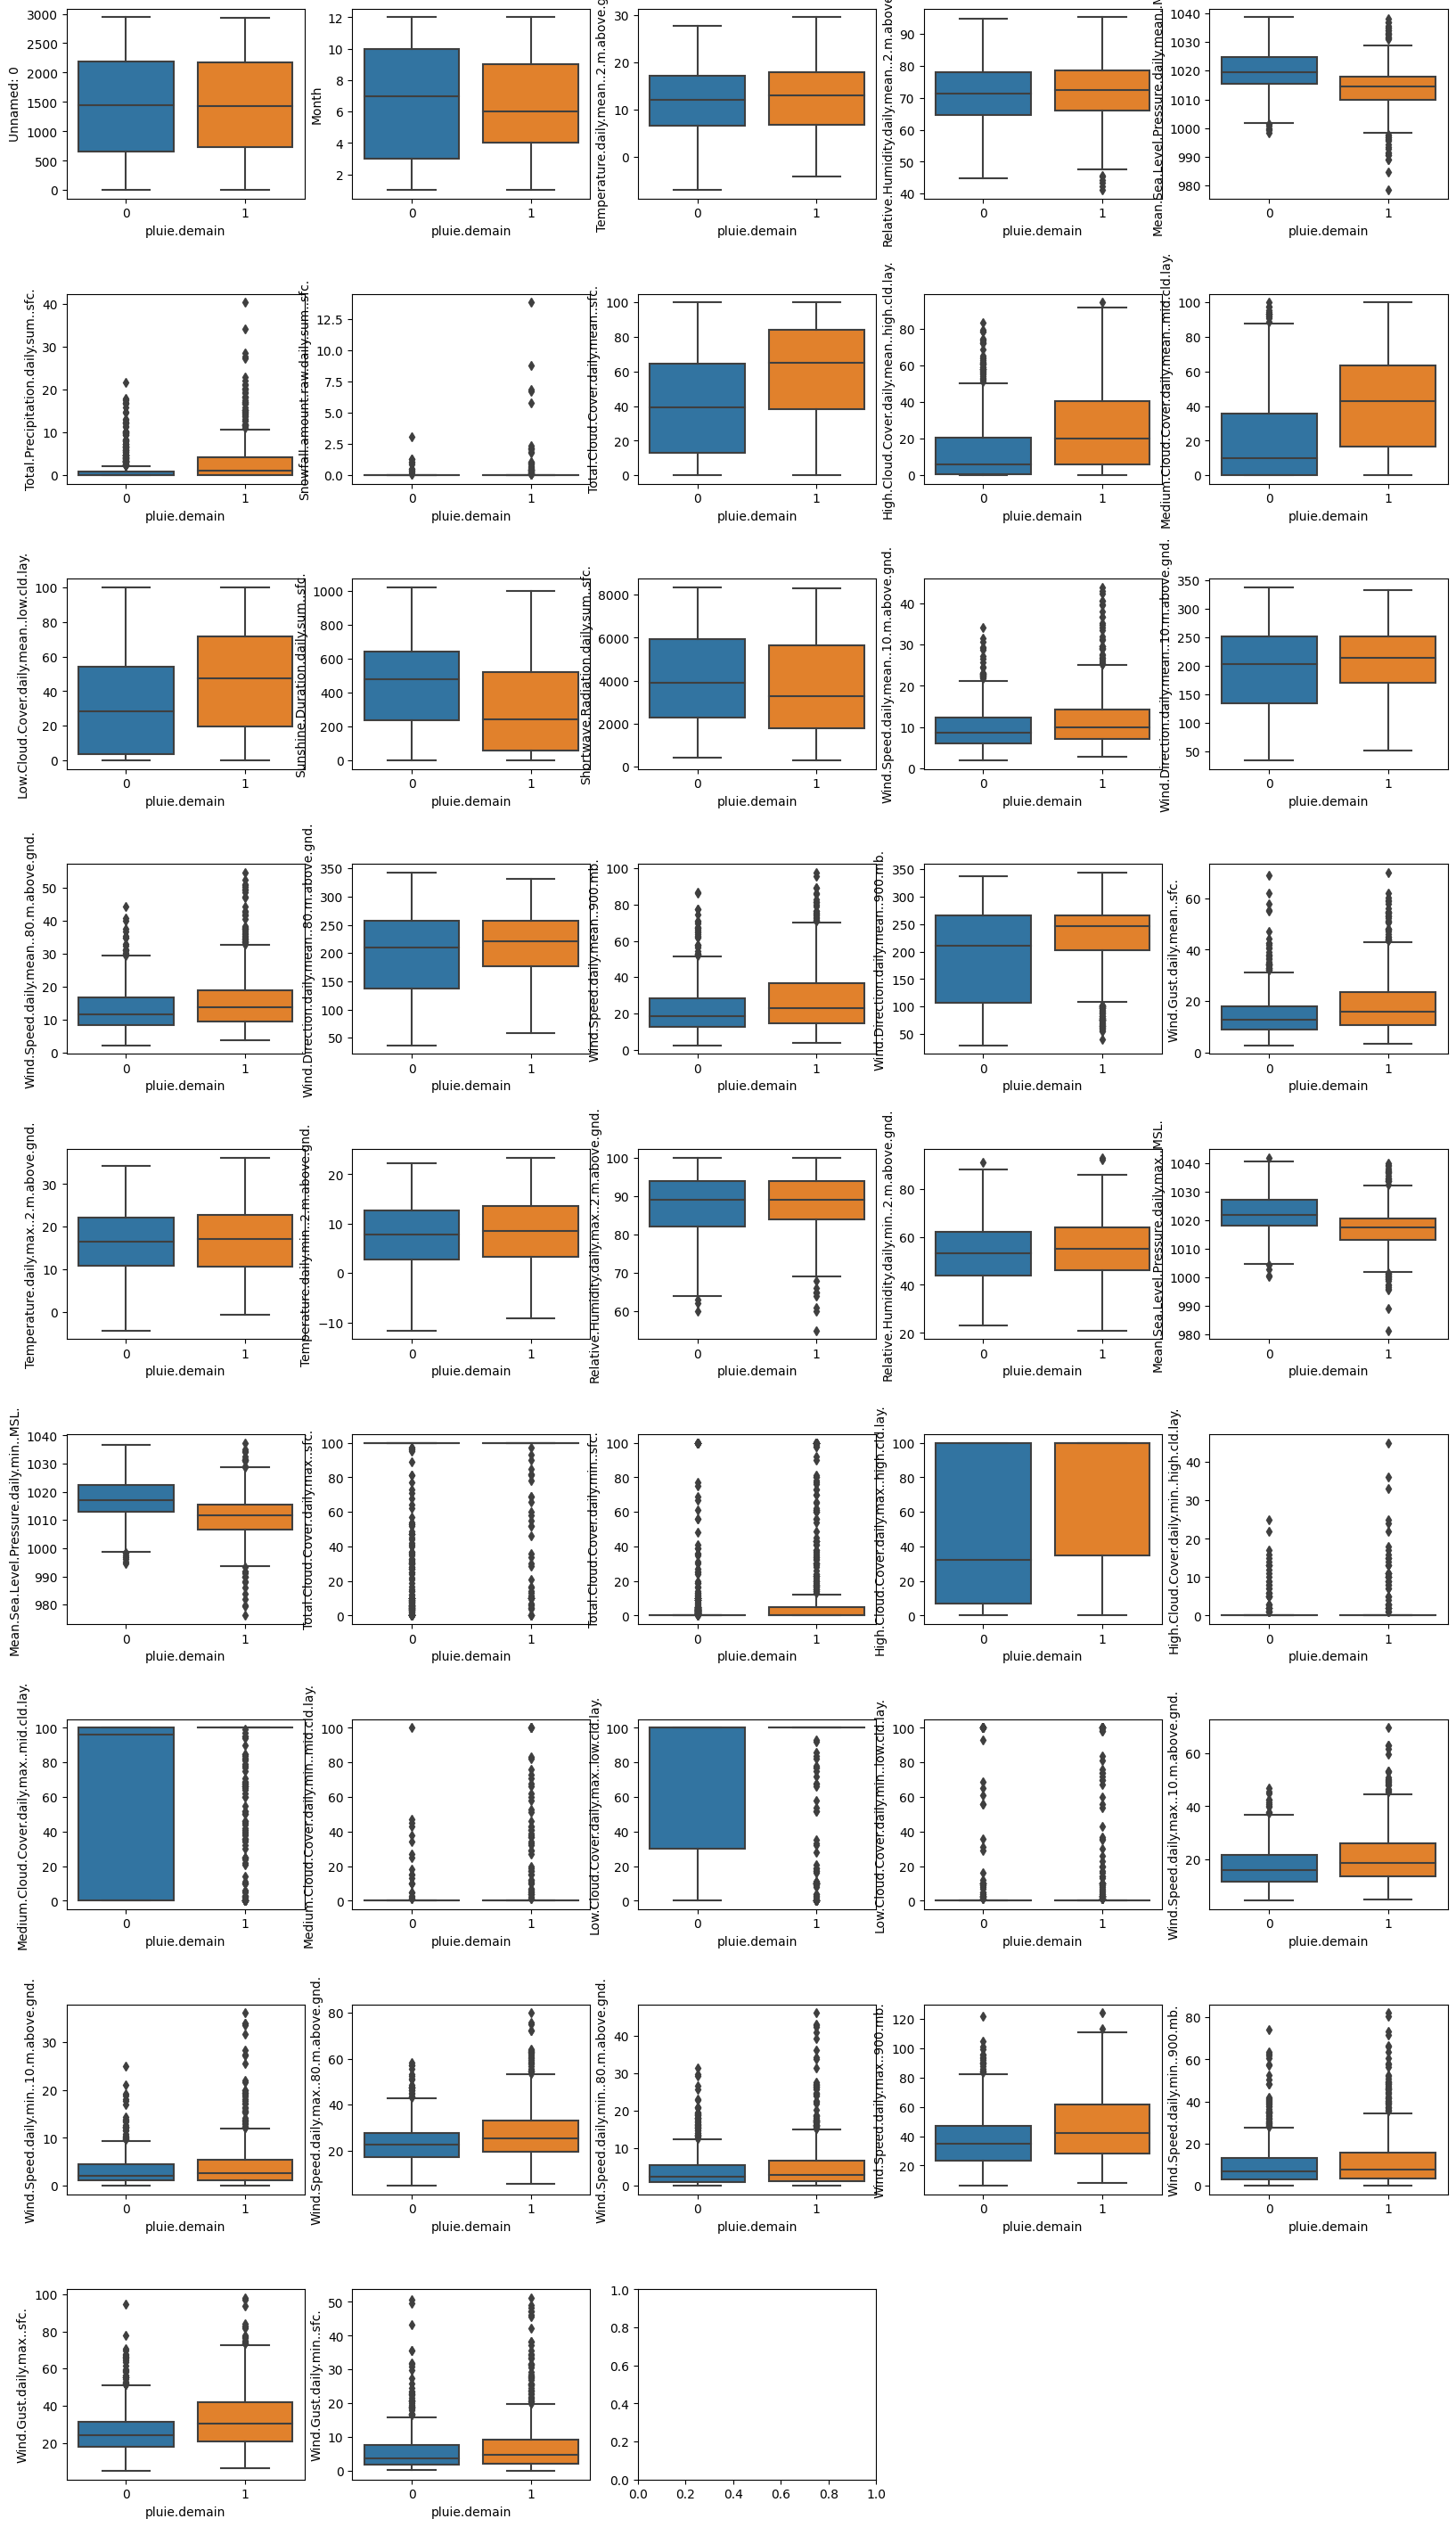

In [ ]:
# Calcul du nombre de lignes nécessaire
nb_lignes = len(Liste_colonne) // 5 + (len(Liste_colonne) % 5 > 0)

# Création de la grille de sous-graphiques
fig, axs = plt.subplots(nb_lignes, 5, figsize=(20, 4 * nb_lignes))

# Ajustement de l'espacement
plt.subplots_adjust(hspace=0.5)

# Boucle pour créer les graphiques
for i, colonne in enumerate(Liste_colonne[:-1]):  # Exclure 'pluie.demain'
    ax = axs[i // 5, i % 5]
    sns.boxplot(x='pluie.demain', y=colonne, data=Clean_dataset, ax=ax)
    #ax.set_title(f"{colonne} vs pluie.demain")

# Suppression des graphiques non utilisés
for i in range(len(Liste_colonne), nb_lignes * 5):
    fig.delaxes(axs.flatten()[i])

plt.show()

<Axes: >

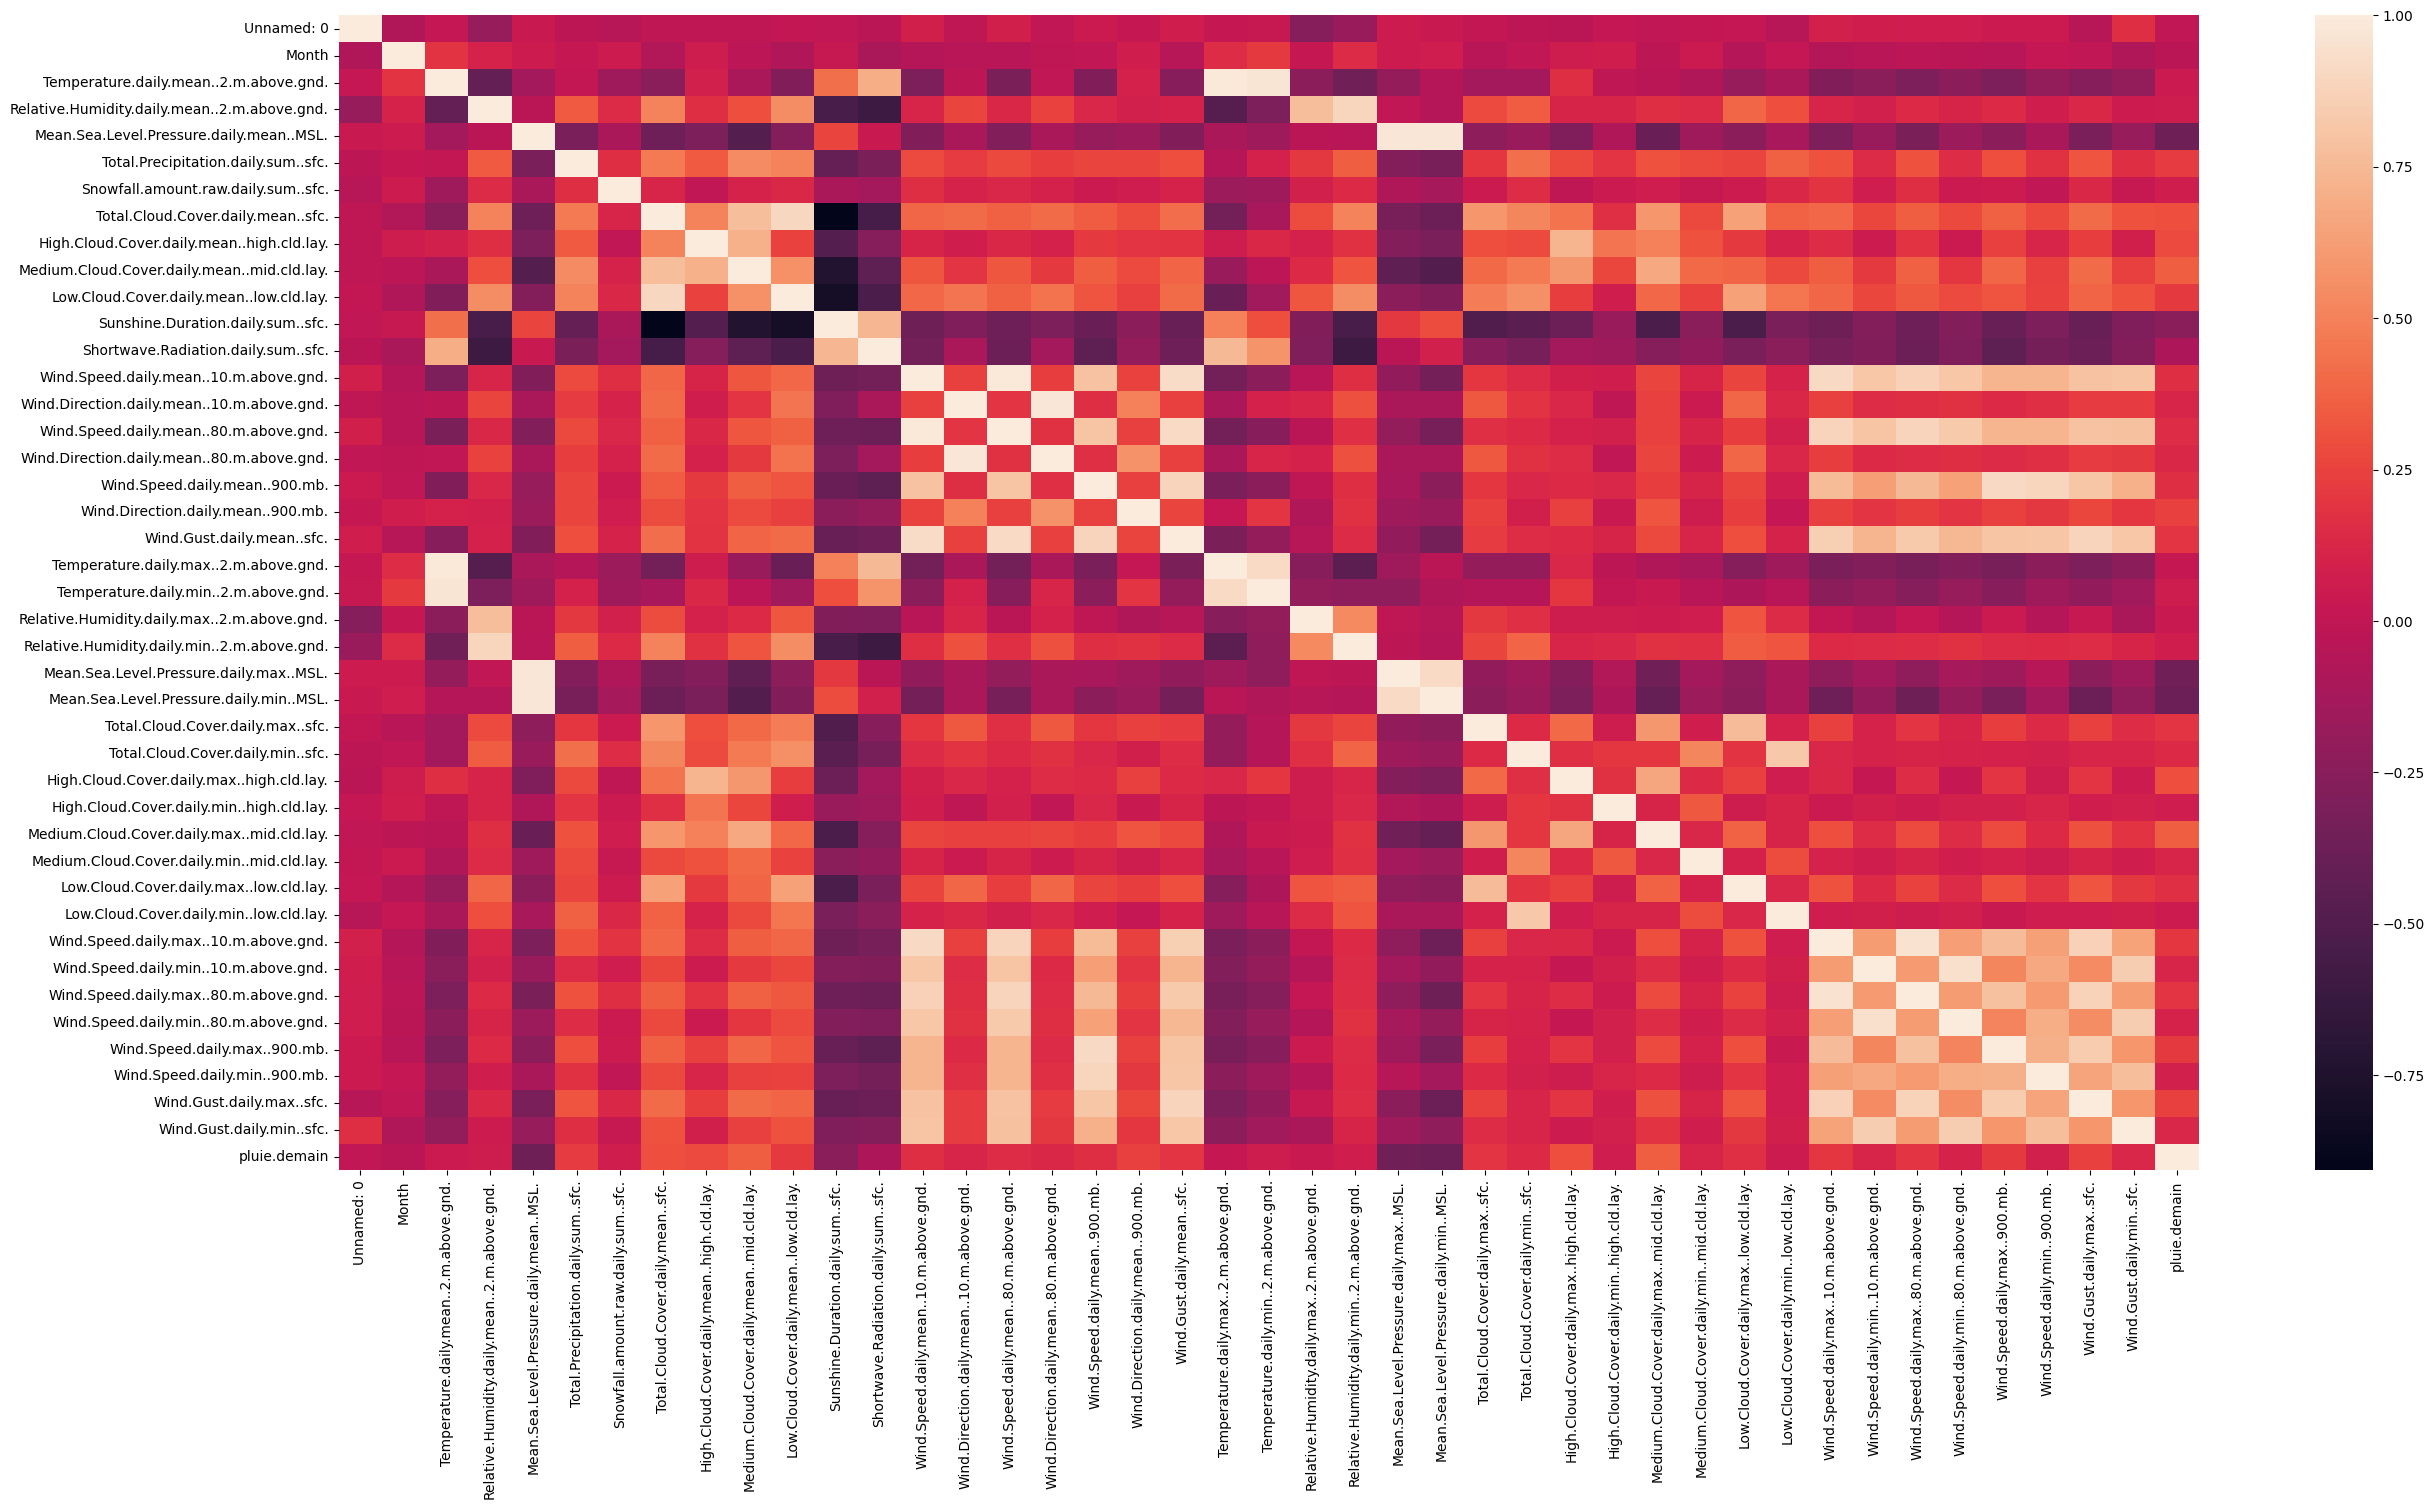

In [ ]:
## Visualisation des correlations
plt.figure(figsize=(30, 15))
sns.heatmap(Clean_dataset.corr())

In [ ]:
# @title PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Nous allons ensuite utiliser youte la base de données suaf la colonne 'pluie.demain et nous allons observer les relations entre les variables

In [ ]:
X1 = Clean_dataset.drop(columns = ["pluie.demain"])
X = scale(X1)
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[13.02765128  5.4970884   4.3657479   2.44716298  2.02779345  1.90021202
  1.56300104  1.22683272  1.09894229  0.98577331]
[0.30993283 0.13077785 0.10386282 0.05821895 0.04824199 0.04520677
 0.0371844  0.02918682 0.02614426 0.02345193]


In [ ]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)],
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,13.027651,31.0,31.0
1,Dim2,5.497088,13.0,44.0
2,Dim3,4.365748,10.0,54.0
3,Dim4,2.447163,6.0,60.0
4,Dim5,2.027793,5.0,65.0
5,Dim6,1.900212,5.0,70.0
6,Dim7,1.563001,4.0,73.0
7,Dim8,1.226833,3.0,76.0
8,Dim9,1.098942,3.0,79.0
9,Dim10,0.985773,2.0,81.0


<Figure size 2400x1200 with 0 Axes>

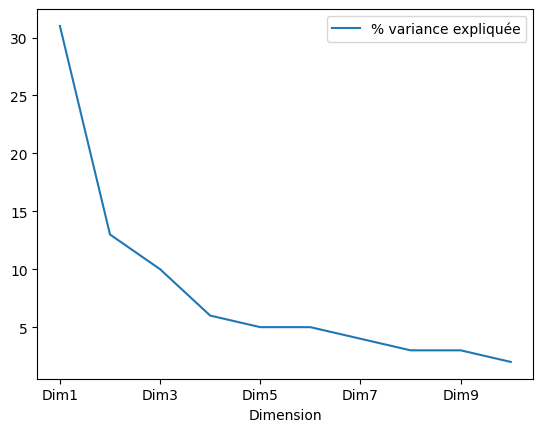

In [ ]:
plt.figure(figsize=(24, 12))
eig.plot.line(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
#plt.text(5, 18, "17%") # ajout de texte
#plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

Ce graphique nous montre qu'on ne peut pas réduire le problème à deux dimensions puisque les composantes principales expliquent environ 44% de la base de données

In [ ]:
# @title Représentation des individus
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [ ]:
#variance expliquée
print(pca.explained_variance_)

[13.02765128  5.4970884 ]


In [ ]:
pca.components_

In [ ]:
# Transformation en DataFrame pandas en prenat les deux premières composantes
X_pca_df = pd.DataFrame({
    "Dim1" : X_pca[:,0],
    "Dim2" : X_pca[:,1],
    "Labels" : Clean_dataset["pluie.demain"],
})

# Résultat (premières lignes)
X_pca_df.head()

,Dim1,Dim2,Labels
0,-0.316647,-2.364624,1
1,0.086273,-2.534068,0
2,-5.819345,1.511887,1
3,-0.937252,-1.343503,1
4,-0.355598,-1.711890,0


In [ ]:
Label= []
for i in X1:
  Label.append(i)

In [ ]:
print(Label)

['Unnamed: 0', 'Month', 'Temperature.daily.mean..2.m.above.gnd.', 'Relative.Humidity.daily.mean..2.m.above.gnd.', 'Mean.Sea.Level.Pressure.daily.mean..MSL.', 'Total.Precipitation.daily.sum..sfc.', 'Snowfall.amount.raw.daily.sum..sfc.', 'Total.Cloud.Cover.daily.mean..sfc.', 'High.Cloud.Cover.daily.mean..high.cld.lay.', 'Medium.Cloud.Cover.daily.mean..mid.cld.lay.', 'Low.Cloud.Cover.daily.mean..low.cld.lay.', 'Sunshine.Duration.daily.sum..sfc.', 'Shortwave.Radiation.daily.sum..sfc.', 'Wind.Speed.daily.mean..10.m.above.gnd.', 'Wind.Direction.daily.mean..10.m.above.gnd.', 'Wind.Speed.daily.mean..80.m.above.gnd.', 'Wind.Direction.daily.mean..80.m.above.gnd.', 'Wind.Speed.daily.mean..900.mb.', 'Wind.Direction.daily.mean..900.mb.', 'Wind.Gust.daily.mean..sfc.', 'Temperature.daily.max..2.m.above.gnd.', 'Temperature.daily.min..2.m.above.gnd.', 'Relative.Humidity.daily.max..2.m.above.gnd.', 'Relative.Humidity.daily.min..2.m.above.gnd.', 'Mean.Sea.Level.Pressure.daily.max..MSL.', 'Mean.Sea.Level.

In [ ]:
X_pca_df[Label] = X1[Label]

In [ ]:
X_pca_df

In [ ]:
plt.axhline?

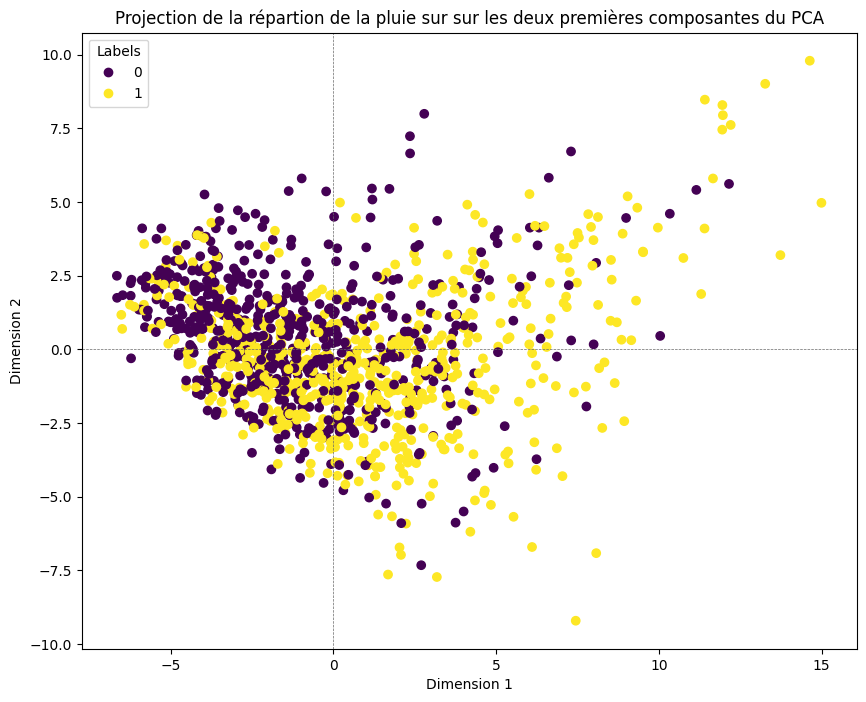

In [ ]:
# @title Projection des données sur sur les deux premières composantes du PCA
# Ajoutez ces lignes après avoir créé X_pca_df


# Tracer le graphique
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_df["Dim1"], X_pca_df["Dim2"], c=X_pca_df["Labels"], cmap='viridis')
plt.axhline(y = 0, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.axvline(x=0, linewidth=.5, color="dimgray", linestyle="--")
# Ajouter une légende
legend = plt.legend(*scatter.legend_elements(), title="Labels")
plt.title('Projection de la répartion de la pluie sur sur les deux premières composantes du PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Ce graphe montre la répartition de la pluie selon les deux composantes principales et justifie bien que le problème est complexe pour être expliqué en deux dimension.

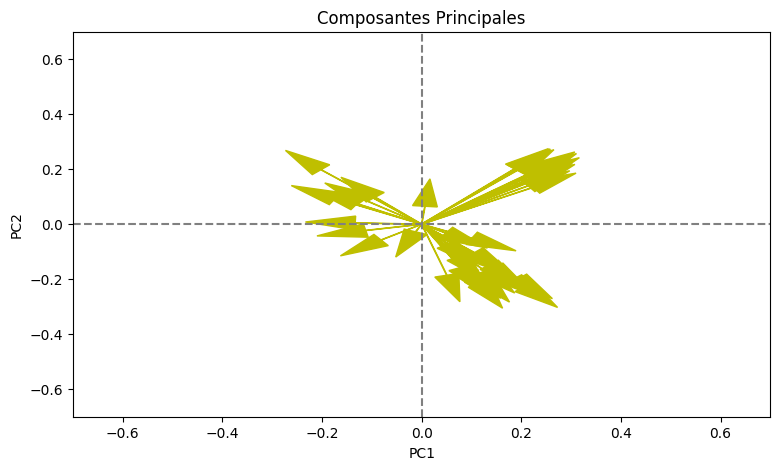

In [ ]:
pcs = pca.components_
plt.figure(figsize=(9, 5))

# Afficher les flèches
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, color='y', head_width=0.05, head_length=0.1)
    #plt.text(x, y, f'Var {i+1}', fontsize='12', ha='right')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])
plt.title('Composantes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Ces vecteurs illustre qu'on ne peut pas simplifier le problème en deux dimensions

In [ ]:
# @title MOdèle de prédiction
## Les features pour l'entraînement et le test sont toutes les colonnes de la novelle dataset sauf la colonne 'pluie.demain'

X_dataset = Clean_dataset.drop('pluie.demain', axis = 1)
## La target ici c'est la colonne 'pluie.demain' qu'on cherche à prédire sachant X

y_dataset = Clean_dataset['pluie.demain']

In [ ]:
## Repartition des données en Train Set et Test Set
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size = 0.3, random_state = 101)
print('Taille de X_train : {}'.format(X_train.shape))

Taille de X_train : (870, 42)


In [ ]:
print('Taille de X_train : {}'.format(X_train.shape))
print('Taille de y_train : {}'.format(y_train.shape))
print('Taille de X_test : {}'.format(X_test.shape))
print('Taille de y_test : {}'.format(y_test.shape))

Taille de X_train : (870, 42)
Taille de y_train : (870,)
Taille de X_test : (374, 42)
Taille de y_test : (374,)


In [ ]:
## Création du model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state = 42)
model

RandomForestClassifier(random_state=42)

In [ ]:
## Injection des données dans le modèle

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
## Predire sur le test set pour évaluer la performance du modèle
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_train, predictions_train )
accuracy_test = accuracy_score(y_test, predictions_test)

In [ ]:
print("Accuracy du modèle sur le Train Set : {:.2f}".format(accuracy_train))
print("Accuracy du modèle sur le Test Set : {:.2f}".format(accuracy_test))

Accuracy du modèle sur le Train Set : 1.00
Accuracy du modèle sur le Test Set : 0.71


On a une accuracy de 100% sur le train set alors que l'accuracy est de 71% sur le test Set. On fait donc face à une problème de Overfitting, ce qui signifie que le modèle a du mal à généraliser ce qu'il a appris. Place au cross validation pour avoir de bons paramètres.

In [ ]:
## Matrice de confusion
matrice_de_confusion = confusion_matrix(y_test, predictions_test)
print(matrice_de_confusion)

[[121  56]
 [ 51 146]]


In [ ]:
# @title Essayons une cross validation avec notre modèle
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split= [2,5]
min_samples_leaf= [1,2]
bootstrap = [True, False]

In [ ]:
param_gird ={'n_estimators': n_estimators,
            'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap' : bootstrap
            }
print(param_gird)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
model_2 = RandomForestClassifier()

In [ ]:
model_Grid = GridSearchCV(estimator= model_2, param_grid = param_gird, cv = 3, verbose = 2, n_jobs = 3)

In [ ]:
model_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
model_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 41}

In [ ]:
print('Train Accuracy : {:.2f}'.format(model_Grid.score(X_train, y_train)))
print('Test Accuracy : {:.2f}'.format(model_Grid.score(X_test, y_test)))

Train Accuracy : 0.77
Test Accuracy : 0.73


77% sur le train et 73% sur le test est mieux que le prémier qui faisait 100% sur le train et 71% sur le test

